In [36]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import scipy as sc
# import scipy.stats as stats

# 1- Generar datos con “corrimiento al rojo” para los datos del Anillo en 2d. Para ello debemos crear mapa de velocidad: en una vecindad de L/10 de cada punto "pivote" en los datos, encontrar el punto más cercano y generar una velocidad para este punto pivote en la dirección del punto más cercano proporcional a su distancia ($v=dist*0.1$). Guardar el nuevo punto con coordenadas $\mathbf{r}=(x, y+v\cdot\hat{j})$

In [2]:
L = 600

In [43]:
N = 1000 #no. de particulas
delta = 10 #ancho del anillo

theta = 2*np.pi*np.random.rand(N) #ángulo random
theta.sort()

r = 290 + np.random.rand(N)*delta #radio del anillo
xan = r*np.cos(theta)
yan =r*np.sin(theta)


In [44]:
Theta = np.linspace(0,2*np.pi,N)
R1 = 290
R2 = 300
x1 = R1*np.cos(Theta)
y1 = R1*np.sin(Theta)

x2 = R2*np.cos(Theta)
y2 = R2*np.sin(Theta)

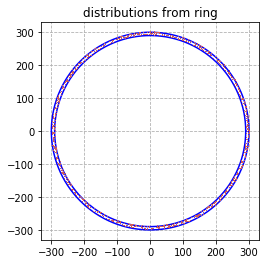

In [45]:
plt.plot(x1,y1, color = 'b')
plt.plot(x2,y2, color = 'b')
#a= 400
plt.plot(xan,yan,',', color = 'indianred')
plt.title('distributions from ring')
plt.axis('scaled');
plt.grid(linestyle = '--')

In [46]:
vy = np.zeros(N)
dist = np.zeros(100)

for i in range(-50,N-50):
    for j in range(100):
        dist[j] = yan[i] - yan[i-50+j]
        
        if dist[j]==0:
            dist[j]=100 #número muy grande pra removerse a sí mismo (el punto i)
            
        vy[i] = min(dist, key = lambda x:abs(x - 0)) #esto es para que se acerque al número cero
        

In [47]:
dt = 180
redshift = yan + dt*vy

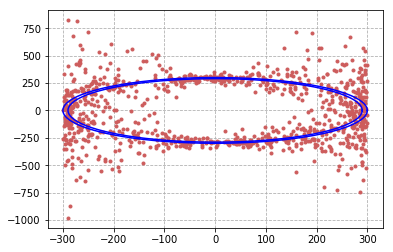

In [56]:
plt.plot(xan, redshift, '.', color = 'indianred')
#plt.plot(xan,yan,',', color = 'b')
plt.plot(x1,y1, color = 'b')
plt.plot(x2,y2, color = 'b')
#plt.axis('scaled');
plt.grid(linestyle = '--')

# 2-Cambiar el código de la función de correlación con estimador de Landy-Salay, para que sea anisotrópico y guarde la componente de cada distancia en X y Y.

In [49]:
def histogramas(datax, datay, Nr,L,barras, barrasth, Rmax = 1000): #Bins = no. de cajones para el histograma  
    #L = 1000 #tamaño de la caja
    
    dx =Rmax/barras #ratio de crecimiento
    dth = np.pi/barrasth #dif de theta
    rango = np.arange(dx/2, Rmax + dx/2, dx)
    rangoth = np.arange(dth/2, np.pi + dth/2, dth)
    
    datax = datax.flatten()
    datay = datay.flatten()
    Nd = len(datax)
    datarandom = np.random.rand(Nr,2)*L
    
    DD = np.zeros((barras,barrasth))
    #DD de la partícula j-ésima hacia la i-ésima
    for j in range(Nd):
        for i in range(j+1,Nd):
            dx_c1 = datax[i] - datax[j]
            dy_c1 = datay[i] - datay[j]
            r_c1 = ((dx_c1)**2 + (dy_c1)**2)**(1/2)
            theta = np.arctan((dx_c1)/(dy_c1)) 
            no_barra = int(round((r_c1/dx) + 0.5) - 1)
            no_barrath = int(round((theta/dth) + 0.5) - 1)
            
            if no_barra < barras:
                DD[no_barra,no_barrath] = DD[no_barra,no_barrath] + 1
        
    #RR de la partícula j-ésima hacia la i-ésima
    RR = np.zeros((barras,barrasth))
    for j in range(Nr):
        for i in range(j+1,Nr):
            rngx_c1 = datarandom[i,0] - datarandom[j,0]
            rngy_c1 = datarandom[i,1] - datarandom[j,1]
            r_rngc1 = ((rngx_c1)**2 + (rngy_c1)**2)**(1/2)
            thetarng = np.arctan((rngx_c1)/(rngy_c1))
            no_barra_rng = int(round((r_rngc1/dx) + 0.5) - 1)
            no_barra_rngth = int(round((thetarng/dth) + 0.5) - 1)
            
            if no_barra_rng < barras:
                RR[no_barra_rng,no_barra_rngth] = RR[no_barra_rng,no_barra_rngth] + 1

        
    #DR de la partícula j-ésima de D hacia la i-ésima de R
    DR = np.zeros((barras,barrasth))
    for j in range(Nd):
        for i in range(Nr):
            xtorng_c1 = datarandom[i,0] - datax[j]
            ytorng_c1 = datarandom[i,1] - datay[j]
            r_dtorng_c1 = ((xtorng_c1)**2 + (ytorng_c1)**2)**(1/2)
            distheta = np.arctan((xtorng_c1)/(ytorng_c1))
            no_barra_dtorng1 = int(round((r_dtorng_c1/dx) + 0.5) - 1)
            no_barra_dth = int(round((distheta/dth) + 0.5) - 1)
            
            if no_barra_dtorng1 < barras:
                
                DR[no_barra_dtorng1,no_barra_dth] = DR[no_barra_dtorng1,no_barra_dth] + 1
            
    """Let's define a functions that normalizes the data"""    
    
    DDnorm = (2*DD)/((Nd)*(Nd-1))
    DRnorm = DR/(Nd*Nr)
    RRnorm = (2*RR)/((Nr)*(Nr-1))
   
    
    return  DDnorm, DRnorm, RRnorm, rango, rangoth

# a) Con este código calcular la función de correlación anisotrópica del ejercicio anterior y graficarla como gráfica de densidad en 2d (se puede usar imshow de matplotlib).

In [51]:
Nr = 500 #numero de data random para calular correlacion
barras = 120
barrath = 120

In [52]:
#data para x
DD, DR, RR, rango, rangoth = histogramas(xan, redshift, Nr,L,barras, barrath, Rmax = 100)

In [53]:
"""correlacion de x"""

CorrX = ((DD -2*DR + RR)/RR)

C:\Users\Dea\Documents\anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dea\Documents\anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.hsv()>

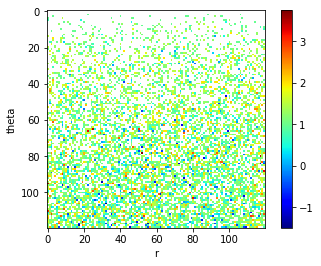

In [54]:
plt.imshow(CorrX, cmap ="jet")
plt.xlabel('r')
plt.ylabel('theta')
plt.colorbar()
plt.hsv